In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

#### Lendo os datasets

In [2]:
df = pd.read_csv("../data/data_2__.csv", delimiter=",")

In [3]:
df.drop('index', axis=1, inplace=True)

### Transformando os valores de data

In [4]:
df['data'] = pd.to_datetime(df['data'])

### Calculando o valor mensal

In [5]:
vetUnicos = df['data'].dt.strftime('%Y-%m').unique()

In [6]:
acumulos = []
for i in vetUnicos:
    acumulos.append(df[df['data'].dt.strftime('%Y-%m') == (i)].sum().valor)

In [7]:
dicionario = {"data":vetUnicos, "total":acumulos}
dfMeses = pd.DataFrame(data=dicionario)
dfMeses

,data,total
0,2014-07,1.50
1,2014-08,54228.86
2,2014-09,79707.74
3,2014-10,92994.49
4,2014-11,99751.70
5,2014-12,121334.26
6,2015-01,80715.76
7,2015-02,72224.63
8,2015-03,73179.45
9,2015-04,263512.38


In [8]:
dfMeses['data'] = pd.to_datetime(dfMeses['data'])

In [9]:
vetorAnos = dfMeses['data'].dt.strftime('%Y')
vetorMeses = dfMeses['data'].dt.strftime('%m')

dicionarioFinal = {"ano":vetorAnos, "mes":vetorMeses, "totalPorMes":dfMeses['total']}
dfFinal = pd.DataFrame(data=dicionarioFinal)

ordem = ['ano', 'mes']
dfFinal = dfFinal.sort_values(by= ordem)

In [10]:
dfFinal

,ano,mes,totalPorMes
0,2014,07,1.50
1,2014,08,54228.86
2,2014,09,79707.74
3,2014,10,92994.49
4,2014,11,99751.70
5,2014,12,121334.26
6,2015,01,80715.76
7,2015,02,72224.63
8,2015,03,73179.45
9,2015,04,263512.38


### Normalizando os dados

In [11]:
#scaler = MinMaxScaler() 
#scaled_values = scaler.fit_transform(dfTrain) 
#dfTrain.loc[:,:] = scaled_values
#dfTrain['totalPorMes'].plot();

In [12]:
#scaler = MinMaxScaler() 
#scaled_values = scaler.fit_transform(dfteste) 
#dfteste.loc[:,:] = scaled_values
#dfteste['totalPorMes'].plot();
#dfteste

### Separando treino e teste

In [13]:
dfteste = dfFinal[dfFinal.index == dfFinal.index[-1]]
dfTrain = dfFinal.drop(dfFinal.index[-1], axis=0)

X_test = dfteste.drop("totalPorMes", axis=1)
y_test = dfteste['totalPorMes']


X_train = dfTrain.drop("totalPorMes", axis=1)
y_train = dfTrain["totalPorMes"]

In [14]:
Vetmae = []
Vetmse = []
Vetrmse = []
modelo = []

## RadomForest

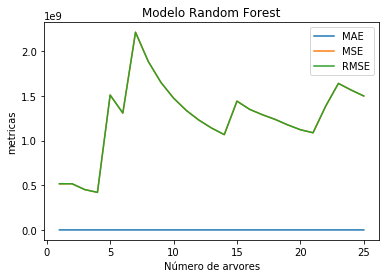

In [15]:
neighbors = np.arange(1, 26)
mae = np.empty(len(neighbors))
mse = np.empty(len(neighbors))
rmse = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    rf = RandomForestRegressor(random_state=5, n_estimators=k)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mae[i] = metrics.mean_absolute_error(y_test, y_pred)
    mse[i] = metrics.mean_squared_error(y_test, y_pred)
    rmse[i] = metrics.mean_squared_error(y_test, y_pred)

# gerando o grafico
plt.title('Modelo Random Forest')
plt.plot(neighbors, mae, label = 'MAE')
plt.plot(neighbors, mse, label = 'MSE')
plt.plot(neighbors, rmse, label = 'RMSE')
plt.legend()
plt.xlabel('Número de arvores')
plt.ylabel('metricas')
plt.show()

In [16]:
rf = RandomForestRegressor(random_state=5, n_estimators=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MAE:', mae)  
print('MSE:', mse)  
print('RMSE:', rmse)

modelo.append("RandomForest")
Vetmae.append(mae)
Vetmse.append(mse)
Vetrmse.append(rmse)

MAE: 38840.987999999954
MSE: 1508622348.8161404
RMSE: 38840.987999999954


In [17]:
y_test

51    457025.59
Name: totalPorMes, dtype: float64

In [18]:
y_pred

array([418184.602])

## KNN

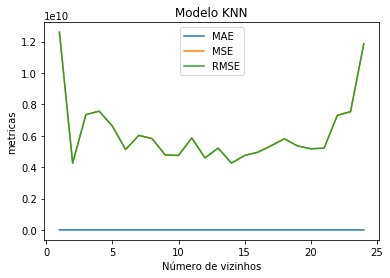

In [19]:
neighbors = np.arange(1, 25)
mae = np.empty(len(neighbors))
mse = np.empty(len(neighbors))
rmse = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    kn = KNeighborsRegressor(n_neighbors=k)
    kn.fit(X_train, y_train)
    y_pred = kn.predict(X_test)
    mae[i] = metrics.mean_absolute_error(y_test, y_pred)
    mse[i] = metrics.mean_squared_error(y_test, y_pred)
    rmse[i] = metrics.mean_squared_error(y_test, y_pred)

# gerando o grafico
plt.title('Modelo KNN')
plt.plot(neighbors, mae, label = 'MAE')
plt.plot(neighbors, mse, label = 'MSE')
plt.plot(neighbors, rmse, label = 'RMSE')
plt.legend()
plt.xlabel('Número de vizinhos')
plt.ylabel('metricas')
plt.show()

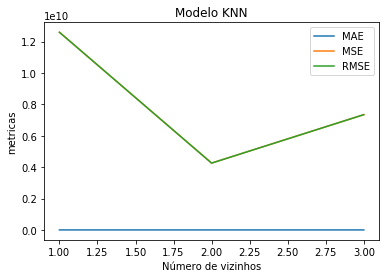

In [20]:
neighbors = np.arange(1, 4)
mae = np.empty(len(neighbors))
mse = np.empty(len(neighbors))
rmse = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    kn = KNeighborsRegressor(n_neighbors=k)
    kn.fit(X_train, y_train)
    y_pred = kn.predict(X_test)
    mae[i] = metrics.mean_absolute_error(y_test, y_pred)
    mse[i] = metrics.mean_squared_error(y_test, y_pred)
    rmse[i] = metrics.mean_squared_error(y_test, y_pred)

# gerando o grafico
plt.title('Modelo KNN')
plt.plot(neighbors, mae, label = 'MAE')
plt.plot(neighbors, mse, label = 'MSE')
plt.plot(neighbors, rmse, label = 'RMSE')
plt.legend()
plt.xlabel('Número de vizinhos')
plt.ylabel('metricas')
plt.show()

In [21]:
kn = KNeighborsRegressor(n_neighbors=2)
kn.fit(X_train, y_train)
y_pred = kn.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MAE:', mae)  
print('MSE:', mse)  
print('RMSE:', rmse)

modelo.append("KNN")
Vetmae.append(mae)
Vetmse.append(mse)
Vetrmse.append(rmse)

MAE: 65248.84999999992
MSE: 4257412426.3224893
RMSE: 65248.84999999992


### BayesianRidge

In [22]:
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MAE:', mae)  
print('MSE:', mse)  
print('RMSE:', rmse)

modelo.append("Bayesian")
Vetmae.append(mae)
Vetmse.append(mse)
Vetrmse.append(rmse)

MAE: 134725.13743784337
MSE: 18150862657.645786
RMSE: 134725.13743784337


### LinearRegression

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MAE:', mae)  
print('MSE:', mse)  
print('RMSE:', rmse)

modelo.append("Linear Regression")
Vetmae.append(mae)
Vetmse.append(mse)
Vetrmse.append(rmse)

MAE: 44076.41854188201
MSE: 1942730671.4791605
RMSE: 44076.41854188201


In [24]:
y_test

51    457025.59
Name: totalPorMes, dtype: float64

In [25]:
y_pred

array([501102.00854188])

In [26]:
modelo

['RandomForest', 'KNN', 'Bayesian', 'Linear Regression']

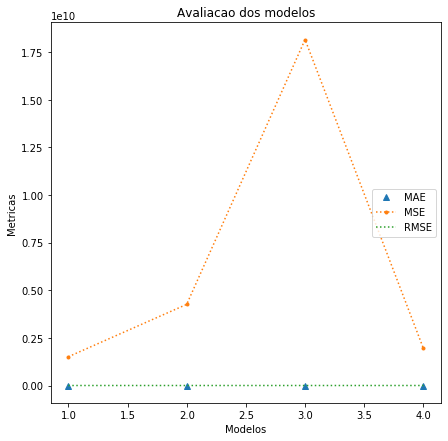

In [27]:
modelos = np.arange(1, len(modelo)+1)

plt.figure(figsize=[7,7])
plt.title('Avaliacao dos modelos')
plt.plot(modelos, Vetmae, '^', label = 'MAE')
plt.plot(modelos, Vetmse, ':.', label = 'MSE')
plt.plot(modelos, Vetrmse,':', label = 'RMSE')
plt.legend(loc='right')
plt.xlabel('Modelos')
plt.ylabel('Metricas')
plt.show()